<a href="https://colab.research.google.com/github/Arem77/Colab/blob/master/dnn_boston_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print('train data shape:', train_data.shape)
print('rest data shape:', test_data.shape)

train data shape: (404, 13)
rest data shape: (102, 13)


In [ ]:
print(train_targets.shape)
print(test_targets.shape)

(404,)
(102,)


In [ ]:
train_targets[0]

15.2

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean)/std

test_data = (test_data - mean)/std

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
history = model.fit(train_data, train_targets,
                    epochs=100,
                    batch_size=1,
                    validation_split=0.2)

Epoch 1/100
323/323 [==============================] - 0s 1ms/step - loss: 203.3260 - mae: 11.1529 - val_loss: 43.7899 - val_mae: 4.9496
Epoch 2/100
323/323 [==============================] - 0s 1ms/step - loss: 30.1895 - mae: 3.7238 - val_loss: 21.1542 - val_mae: 3.2605
Epoch 3/100
323/323 [==============================] - 0s 1ms/step - loss: 19.7390 - mae: 2.9359 - val_loss: 16.6861 - val_mae: 2.9008
Epoch 4/100
323/323 [==============================] - 0s 1ms/step - loss: 16.9996 - mae: 2.6624 - val_loss: 14.1945 - val_mae: 2.8103
Epoch 5/100
323/323 [==============================] - 0s 1ms/step - loss: 14.9919 - mae: 2.5246 - val_loss: 13.6850 - val_mae: 2.7005
Epoch 6/100
323/323 [==============================] - 0s 1ms/step - loss: 14.2805 - mae: 2.3508 - val_loss: 12.6745 - val_mae: 2.7556
Epoch 7/100
323/323 [==============================] - 0s 1ms/step - loss: 13.2736 - mae: 2.4128 - val_loss: 11.5891 - val_mae: 2.6305
Epoch 8/100
323/323 [==============================] 

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

In [ ]:
import matplotlib.pyplot as plt

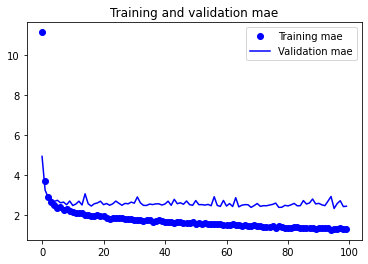

In [ ]:
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.show()

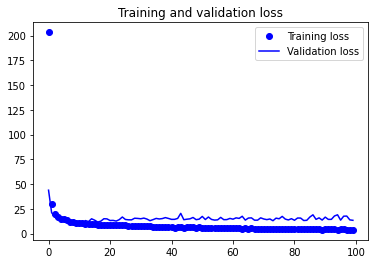

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

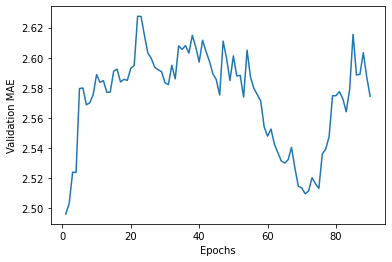

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.1015 - mae: 2.6495


In [ ]:
from tensorflow.keras import regularizers

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001),
                        input_shape=(train_data.shape[1],)))
model2.add(layers.Dense(64, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model2.add(layers.Dense(1))

In [ ]:
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model2.fit(train_data, train_targets,
                     epochs=100,
                     batch_size=1,
                     validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 2ms/sample - loss: 201.0558 - mean_absolute_error: 10.2586 - val_loss: 51.1760 - val_mean_absolute_error: 5.1035
Epoch 2/100
323/323 [==============================] - 0s 1ms/sample - loss: 29.0464 - mean_absolute_error: 3.6842 - val_loss: 25.5232 - val_mean_absolute_error: 3.5281
Epoch 3/100
323/323 [==============================] - 0s 1ms/sample - loss: 21.7073 - mean_absolute_error: 3.1003 - val_loss: 18.9436 - val_mean_absolute_error: 3.0725
Epoch 4/100
323/323 [==============================] - 0s 1ms/sample - loss: 17.9586 - mean_absolute_error: 2.7981 - val_loss: 14.9697 - val_mean_absolute_error: 2.8355
Epoch 5/100
323/323 [==============================] - 0s 1ms/sample - loss: 15.7628 - mean_absolute_error: 2.4805 - val_loss: 14.9618 - val_mean_absolute_error: 2.8386
Epoch 6/100
323/323 [==============================] - 0s 1ms/sample - loss: 13.8484 - mean_absolute_error: 

In [ ]:
l2_mae = history.history['mean_absolute_error']
l2_val_mae = history.history['val_mean_absolute_error']

l2_loss = history.history['loss']
l2_val_loss = history.history['val_loss']

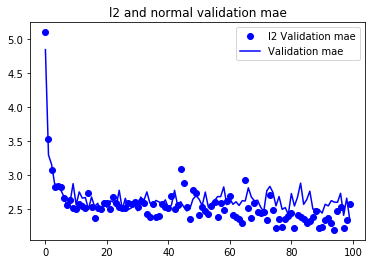

In [ ]:
plt.plot(epochs, l2_val_mae, 'bo', label='l2 Validation mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('l2 and normal validation mae')
plt.legend()

plt.show()

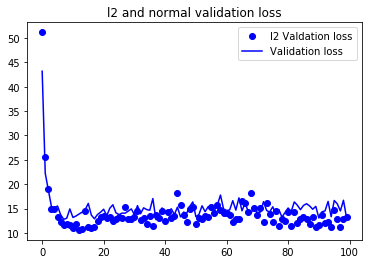

In [ ]:
plt.plot(epochs, l2_val_loss, 'bo', label='l2 Valdation loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('l2 and normal validation loss')
plt.legend()

plt.show()

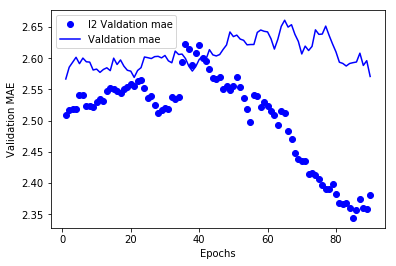

In [ ]:
smooth_l2_mae_history = smooth_curve(l2_val_mae[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_l2_mae_history, 'bo', label='l2 Valdation mae')
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history, 'b', label='Valdation mae')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()